# Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
pd.set_option("display.max_columns",None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
import pickle
from sklearn.utils import resample

for dirname,_,filenames in os.walk("dataset"):
    for filename in filenames:
        print(os.path.join(dirname,filename))

dataset\NF-ToN-IoT-v2-002.csv


# Data Loading

In [2]:
df = pd.read_csv("dataset/NF-ToN-IoT-v2-002.csv", nrows=5000000)

**Preliminary Analysis**

In [3]:
df.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,DURATION_IN,DURATION_OUT,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,SHORTEST_FLOW_PKT,MIN_IP_PKT_LEN,MAX_IP_PKT_LEN,SRC_TO_DST_SECOND_BYTES,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_IN_BYTES,RETRANSMITTED_IN_PKTS,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_UP_TO_128_BYTES,NUM_PKTS_128_TO_256_BYTES,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack
0,192.168.1.193,49235,192.168.1.33,4444,6,0.0,155392,202,34552,149,24,24,24,4294952,15,15,128,128,1500,40,40,1500,155392.0,34552.0,0,0,0,0,77696000,17272000,56,150,36,14,95,45555,4805,0,0,0,0,0,0,1,ransomware
1,192.168.1.193,49228,192.168.1.152,1880,6,0.0,1600,40,35741,65,24,16,24,4294952,15,15,128,128,1286,40,40,1286,1600.0,35741.0,0,0,0,0,800000,17864000,47,3,30,19,6,16425,237,0,0,0,0,0,0,0,Benign
2,192.168.1.152,0,192.168.1.193,0,1,0.0,212,2,0,0,0,0,0,0,0,0,64,64,106,106,0,106,212.0,0.0,0,0,0,0,1696000,0,2,0,0,0,0,0,0,771,3,0,0,0,0,0,Benign
3,192.168.1.169,65317,239.255.255.250,1900,17,0.0,165,1,0,0,0,0,0,0,0,0,0,0,165,165,0,165,165.0,0.0,0,0,0,0,1320000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Benign
4,192.168.1.79,60766,192.168.1.255,15600,17,0.0,63,1,0,0,0,0,0,0,0,0,0,0,63,63,0,63,63.0,0.0,0,0,0,0,504000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Benign


In [4]:
df.shape

(5000000, 45)

In [5]:
df.columns.tolist()

['IPV4_SRC_ADDR',
 'L4_SRC_PORT',
 'IPV4_DST_ADDR',
 'L4_DST_PORT',
 'PROTOCOL',
 'L7_PROTO',
 'IN_BYTES',
 'IN_PKTS',
 'OUT_BYTES',
 'OUT_PKTS',
 'TCP_FLAGS',
 'CLIENT_TCP_FLAGS',
 'SERVER_TCP_FLAGS',
 'FLOW_DURATION_MILLISECONDS',
 'DURATION_IN',
 'DURATION_OUT',
 'MIN_TTL',
 'MAX_TTL',
 'LONGEST_FLOW_PKT',
 'SHORTEST_FLOW_PKT',
 'MIN_IP_PKT_LEN',
 'MAX_IP_PKT_LEN',
 'SRC_TO_DST_SECOND_BYTES',
 'DST_TO_SRC_SECOND_BYTES',
 'RETRANSMITTED_IN_BYTES',
 'RETRANSMITTED_IN_PKTS',
 'RETRANSMITTED_OUT_BYTES',
 'RETRANSMITTED_OUT_PKTS',
 'SRC_TO_DST_AVG_THROUGHPUT',
 'DST_TO_SRC_AVG_THROUGHPUT',
 'NUM_PKTS_UP_TO_128_BYTES',
 'NUM_PKTS_128_TO_256_BYTES',
 'NUM_PKTS_256_TO_512_BYTES',
 'NUM_PKTS_512_TO_1024_BYTES',
 'NUM_PKTS_1024_TO_1514_BYTES',
 'TCP_WIN_MAX_IN',
 'TCP_WIN_MAX_OUT',
 'ICMP_TYPE',
 'ICMP_IPV4_TYPE',
 'DNS_QUERY_ID',
 'DNS_QUERY_TYPE',
 'DNS_TTL_ANSWER',
 'FTP_COMMAND_RET_CODE',
 'Label',
 'Attack']

In [6]:
processed_columns = [feature.strip() for feature in df.columns.tolist()]

In [7]:
df.columns = processed_columns
df.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,DURATION_IN,DURATION_OUT,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,SHORTEST_FLOW_PKT,MIN_IP_PKT_LEN,MAX_IP_PKT_LEN,SRC_TO_DST_SECOND_BYTES,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_IN_BYTES,RETRANSMITTED_IN_PKTS,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_UP_TO_128_BYTES,NUM_PKTS_128_TO_256_BYTES,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack
0,192.168.1.193,49235,192.168.1.33,4444,6,0.0,155392,202,34552,149,24,24,24,4294952,15,15,128,128,1500,40,40,1500,155392.0,34552.0,0,0,0,0,77696000,17272000,56,150,36,14,95,45555,4805,0,0,0,0,0,0,1,ransomware
1,192.168.1.193,49228,192.168.1.152,1880,6,0.0,1600,40,35741,65,24,16,24,4294952,15,15,128,128,1286,40,40,1286,1600.0,35741.0,0,0,0,0,800000,17864000,47,3,30,19,6,16425,237,0,0,0,0,0,0,0,Benign
2,192.168.1.152,0,192.168.1.193,0,1,0.0,212,2,0,0,0,0,0,0,0,0,64,64,106,106,0,106,212.0,0.0,0,0,0,0,1696000,0,2,0,0,0,0,0,0,771,3,0,0,0,0,0,Benign
3,192.168.1.169,65317,239.255.255.250,1900,17,0.0,165,1,0,0,0,0,0,0,0,0,0,0,165,165,0,165,165.0,0.0,0,0,0,0,1320000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Benign
4,192.168.1.79,60766,192.168.1.255,15600,17,0.0,63,1,0,0,0,0,0,0,0,0,0,0,63,63,0,63,63.0,0.0,0,0,0,0,504000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Benign


# Data Preprocessing

**NullValuesChecking**

In [8]:
for feature in df.columns:
    print(f"Feature: {feature:<30} | Number of Null Values: {df[feature].isnull().sum()}")

Feature: IPV4_SRC_ADDR                  | Number of Null Values: 0
Feature: L4_SRC_PORT                    | Number of Null Values: 0
Feature: IPV4_DST_ADDR                  | Number of Null Values: 0
Feature: L4_DST_PORT                    | Number of Null Values: 0
Feature: PROTOCOL                       | Number of Null Values: 0
Feature: L7_PROTO                       | Number of Null Values: 0
Feature: IN_BYTES                       | Number of Null Values: 0
Feature: IN_PKTS                        | Number of Null Values: 0
Feature: OUT_BYTES                      | Number of Null Values: 0
Feature: OUT_PKTS                       | Number of Null Values: 0
Feature: TCP_FLAGS                      | Number of Null Values: 0
Feature: CLIENT_TCP_FLAGS               | Number of Null Values: 0
Feature: SERVER_TCP_FLAGS               | Number of Null Values: 0
Feature: FLOW_DURATION_MILLISECONDS     | Number of Null Values: 0
Feature: DURATION_IN                    | Number of Null Value

In [9]:
for feature in df.columns.tolist():
    print('{:<30} -> {} infinity values'.format(feature, df[feature].isin([np.inf, -np.inf]).sum()),'\n')

IPV4_SRC_ADDR                  -> 0 infinity values 

L4_SRC_PORT                    -> 0 infinity values 

IPV4_DST_ADDR                  -> 0 infinity values 

L4_DST_PORT                    -> 0 infinity values 

PROTOCOL                       -> 0 infinity values 

L7_PROTO                       -> 0 infinity values 

IN_BYTES                       -> 0 infinity values 

IN_PKTS                        -> 0 infinity values 

OUT_BYTES                      -> 0 infinity values 

OUT_PKTS                       -> 0 infinity values 

TCP_FLAGS                      -> 0 infinity values 

CLIENT_TCP_FLAGS               -> 0 infinity values 

SERVER_TCP_FLAGS               -> 0 infinity values 

FLOW_DURATION_MILLISECONDS     -> 0 infinity values 

DURATION_IN                    -> 0 infinity values 

DURATION_OUT                   -> 0 infinity values 

MIN_TTL                        -> 0 infinity values 

MAX_TTL                        -> 0 infinity values 

LONGEST_FLOW_PKT            

In [10]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [11]:
df['Attack'].value_counts()

Benign        2641663
scanning      2324473
password        12918
dos              7402
xss              6188
ddos             4098
injection        2723
mitm              502
ransomware         33
Name: Attack, dtype: int64

In [12]:
df = df.drop(labels=df[df['Attack']=='mitm'].index)
df = df.drop(labels=df[df['Attack']=='ransomware'].index)

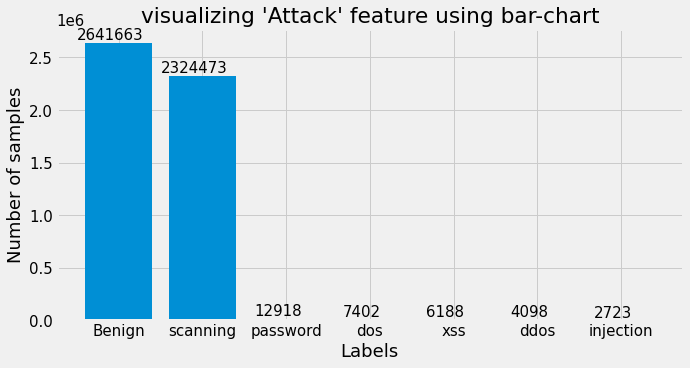

In [13]:
chart_df = dict(df['Attack'].value_counts())
with plt.style.context(style='fivethirtyeight'):
    plt.figure(figsize=(10,5))
    plt.rcParams['font.size'] = 15
    barchart_object = plt.bar(
        x=list(chart_df.keys()),
        height=list(chart_df.values())
    )
    plt.title(label="visualizing 'Attack' feature using bar-chart")
    plt.xlabel(xlabel='Labels')
    plt.ylabel(ylabel='Number of samples')
    for bar, count in zip(barchart_object, list(chart_df.values())):
        plt.text(
            x=bar.get_x() + bar.get_width() / 2 - 0.1,
            y=bar.get_height() + 0.1,
            s=str(count),
            ha='center',
            va='bottom'
        )
    plt.show()

In [14]:
labels_list=list(df['Attack'].unique())
resampled_recs=[]
for i in tqdm(range(len(labels_list))):
    resampled_recs.append(resample(df.loc[df['Attack']==labels_list[i]],n_samples=5000))
    
df=pd.concat(objs=resampled_recs,ignore_index=True)
df=df.sample(frac=1).reset_index(drop=True)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.47it/s]


In [15]:
df.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,DURATION_IN,DURATION_OUT,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,SHORTEST_FLOW_PKT,MIN_IP_PKT_LEN,MAX_IP_PKT_LEN,SRC_TO_DST_SECOND_BYTES,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_IN_BYTES,RETRANSMITTED_IN_PKTS,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_UP_TO_128_BYTES,NUM_PKTS_128_TO_256_BYTES,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack
0,192.168.1.30,58588,192.168.1.152,80,6,7.0,517,3,604,2,28,28,24,0,0,0,64,64,552,52,52,552,517.0,604.0,0,0,0,0,4136000,4832000,3,0,1,1,0,237,235,0,0,0,0,0,0,1,injection
1,192.168.1.30,58114,192.168.1.152,80,6,7.0,460,3,11697,9,28,28,24,0,0,0,64,64,1500,52,52,1500,460.0,11697.0,0,0,0,0,3680000,93576000,3,0,1,0,8,404,235,0,0,0,0,0,0,1,injection
2,192.168.1.30,34524,192.168.1.194,80,6,0.0,799,10,1275,7,31,30,31,4294905,31,46,64,64,943,40,40,943,799.0,1275.0,0,0,0,0,192000,216000,15,0,1,1,0,29200,5792,0,0,0,0,0,0,1,ddos
3,192.168.1.32,35311,192.168.35.227,80,6,7.0,40,1,0,0,16,16,0,0,0,0,0,0,40,40,0,40,40.0,0.0,0,0,0,0,320000,0,1,0,0,0,0,1024,0,0,0,0,0,0,0,1,scanning
4,192.168.1.31,46126,192.168.1.1,53,17,0.0,50,1,50,1,0,0,0,0,0,0,0,0,50,50,50,50,50.0,50.0,0,0,0,0,400000,400000,2,0,0,0,0,0,0,0,0,33259,1,0,0,1,dos


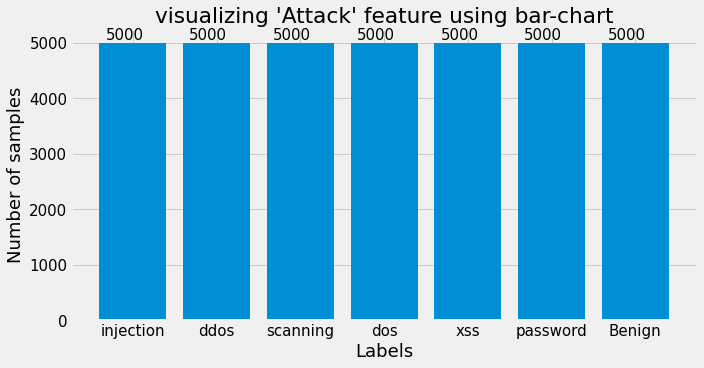

In [16]:
chart_df = dict(df['Attack'].value_counts())
with plt.style.context(style='fivethirtyeight'):
    plt.figure(figsize=(10,5))
    plt.rcParams['font.size'] = 15
    barchart_object = plt.bar(
        x=list(chart_df.keys()),
        height=list(chart_df.values())
    )
    plt.title(label="visualizing 'Attack' feature using bar-chart")
    plt.xlabel(xlabel='Labels')
    plt.ylabel(ylabel='Number of samples')
    for bar, count in zip(barchart_object, list(chart_df.values())):
        plt.text(
            x=bar.get_x() + bar.get_width() / 2 - 0.1,
            y=bar.get_height() + 0.1,
            s=str(count),
            ha='center',
            va='bottom'
        )
    plt.show()

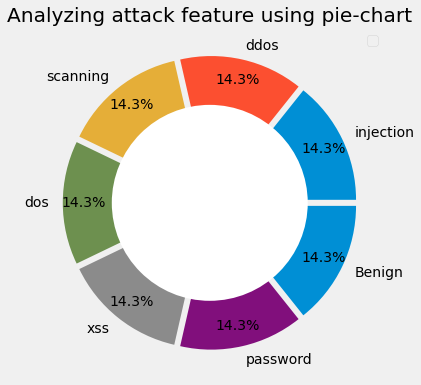

In [17]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(6,6))
    plt.pie(df['Attack'].value_counts(),
            labels=df['Attack'].unique(),
            autopct='%1.1f%%', 
            pctdistance=0.85,
            explode=[0.05]*len(df['Attack'].unique()))
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(label='Analyzing attack feature using pie-chart')
    plt.legend([])
    plt.show()

In [18]:
class_labels = df['Attack'].unique().tolist()
class_labels.sort()

print(class_labels)

['Benign', 'ddos', 'dos', 'injection', 'password', 'scanning', 'xss']


In [19]:
class_dict={}
for idx, label in enumerate(class_labels):
    class_dict[label] = idx
print(class_dict)

{'Benign': 0, 'ddos': 1, 'dos': 2, 'injection': 3, 'password': 4, 'scanning': 5, 'xss': 6}


In [20]:
df['Attack'] = df['Attack'].map(class_dict)
df.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,DURATION_IN,DURATION_OUT,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,SHORTEST_FLOW_PKT,MIN_IP_PKT_LEN,MAX_IP_PKT_LEN,SRC_TO_DST_SECOND_BYTES,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_IN_BYTES,RETRANSMITTED_IN_PKTS,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_UP_TO_128_BYTES,NUM_PKTS_128_TO_256_BYTES,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack
0,192.168.1.30,58588,192.168.1.152,80,6,7.0,517,3,604,2,28,28,24,0,0,0,64,64,552,52,52,552,517.0,604.0,0,0,0,0,4136000,4832000,3,0,1,1,0,237,235,0,0,0,0,0,0,1,3
1,192.168.1.30,58114,192.168.1.152,80,6,7.0,460,3,11697,9,28,28,24,0,0,0,64,64,1500,52,52,1500,460.0,11697.0,0,0,0,0,3680000,93576000,3,0,1,0,8,404,235,0,0,0,0,0,0,1,3
2,192.168.1.30,34524,192.168.1.194,80,6,0.0,799,10,1275,7,31,30,31,4294905,31,46,64,64,943,40,40,943,799.0,1275.0,0,0,0,0,192000,216000,15,0,1,1,0,29200,5792,0,0,0,0,0,0,1,1
3,192.168.1.32,35311,192.168.35.227,80,6,7.0,40,1,0,0,16,16,0,0,0,0,0,0,40,40,0,40,40.0,0.0,0,0,0,0,320000,0,1,0,0,0,0,1024,0,0,0,0,0,0,0,1,5
4,192.168.1.31,46126,192.168.1.1,53,17,0.0,50,1,50,1,0,0,0,0,0,0,0,0,50,50,50,50,50.0,50.0,0,0,0,0,400000,400000,2,0,0,0,0,0,0,0,0,33259,1,0,0,1,2


In [21]:
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,DURATION_IN,DURATION_OUT,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,SHORTEST_FLOW_PKT,MIN_IP_PKT_LEN,MAX_IP_PKT_LEN,SRC_TO_DST_SECOND_BYTES,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_IN_BYTES,RETRANSMITTED_IN_PKTS,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_UP_TO_128_BYTES,NUM_PKTS_128_TO_256_BYTES,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack
0,192.168.1.32,46716,192.168.1.1,53,17,0.0,54,1,54,1,0,0,0,0,0,0,0,0,54,54,54,54,54.0,54.0,0,0,0,0,432000,432000,2,0,0,0,0,0,0,0,0,46447,1,0,0,1,6
1,192.168.1.31,55732,192.168.1.194,80,6,7.0,520,4,1236,2,30,30,26,0,0,0,64,64,1176,52,52,1176,520.0,1236.0,0,0,0,0,4160000,9888000,4,0,1,0,1,29200,5792,0,0,0,0,0,0,1,1
2,192.168.1.32,41882,192.168.1.180,28129,6,0.0,48,1,0,0,2,2,0,0,0,0,0,0,48,48,0,48,48.0,0.0,0,0,0,0,384000,0,1,0,0,0,0,4096,0,0,0,0,0,0,0,1,5
3,192.168.1.31,40890,192.168.1.1,53,17,0.0,72,1,0,0,0,0,0,0,0,0,0,0,72,72,0,72,72.0,0.0,0,0,0,0,576000,0,1,0,0,0,0,0,0,0,0,64846,12,0,0,1,2
4,192.168.1.32,6482,192.168.1.180,22666,6,0.0,48,1,0,0,2,2,0,0,0,0,0,0,48,48,0,48,48.0,0.0,0,0,0,0,384000,0,1,0,0,0,0,4096,0,0,0,0,0,0,0,1,5
5,192.168.1.30,51576,192.168.1.180,16616,6,0.0,48,1,0,0,2,2,0,0,0,0,0,0,48,48,0,48,48.0,0.0,0,0,0,0,384000,0,1,0,0,0,0,4096,0,0,0,0,0,0,0,1,5
6,192.168.1.30,36580,192.168.1.1,53,17,0.0,72,1,72,1,0,0,0,0,0,0,0,0,72,72,72,72,72.0,72.0,0,0,0,0,576000,576000,2,0,0,0,0,0,0,0,0,22537,12,0,0,1,2
7,192.168.1.32,54572,192.168.1.190,80,6,7.0,84,2,44,1,22,6,18,0,0,0,64,64,44,40,40,44,84.0,44.0,0,0,0,0,672000,352000,3,0,0,0,0,1024,29200,0,0,0,0,0,0,1,4
8,192.168.1.32,43906,192.168.1.195,80,6,7.0,84,2,44,1,22,6,18,0,0,0,64,64,44,40,40,44,84.0,44.0,0,0,0,0,672000,352000,3,0,0,0,0,1024,64240,0,0,0,0,0,0,1,4
9,192.168.1.30,50526,192.168.1.190,80,6,7.0,480,3,670,3,26,26,26,0,0,0,64,64,558,52,52,558,480.0,670.0,0,0,0,0,3840000,5360000,4,0,1,1,0,29200,28960,0,0,0,0,0,0,1,3


In [22]:
df = df.drop(labels=['Label','IPV4_SRC_ADDR','IPV4_DST_ADDR'], axis=1)
df.head()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,DURATION_IN,DURATION_OUT,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,SHORTEST_FLOW_PKT,MIN_IP_PKT_LEN,MAX_IP_PKT_LEN,SRC_TO_DST_SECOND_BYTES,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_IN_BYTES,RETRANSMITTED_IN_PKTS,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_UP_TO_128_BYTES,NUM_PKTS_128_TO_256_BYTES,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Attack
0,46716,53,17,0.0,54,1,54,1,0,0,0,0,0,0,0,0,54,54,54,54,54.0,54.0,0,0,0,0,432000,432000,2,0,0,0,0,0,0,0,0,46447,1,0,0,6
1,55732,80,6,7.0,520,4,1236,2,30,30,26,0,0,0,64,64,1176,52,52,1176,520.0,1236.0,0,0,0,0,4160000,9888000,4,0,1,0,1,29200,5792,0,0,0,0,0,0,1
2,41882,28129,6,0.0,48,1,0,0,2,2,0,0,0,0,0,0,48,48,0,48,48.0,0.0,0,0,0,0,384000,0,1,0,0,0,0,4096,0,0,0,0,0,0,0,5
3,40890,53,17,0.0,72,1,0,0,0,0,0,0,0,0,0,0,72,72,0,72,72.0,0.0,0,0,0,0,576000,0,1,0,0,0,0,0,0,0,0,64846,12,0,0,2
4,6482,22666,6,0.0,48,1,0,0,2,2,0,0,0,0,0,0,48,48,0,48,48.0,0.0,0,0,0,0,384000,0,1,0,0,0,0,4096,0,0,0,0,0,0,0,5


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   L4_SRC_PORT                  35000 non-null  int64  
 1   L4_DST_PORT                  35000 non-null  int64  
 2   PROTOCOL                     35000 non-null  int64  
 3   L7_PROTO                     35000 non-null  float64
 4   IN_BYTES                     35000 non-null  int64  
 5   IN_PKTS                      35000 non-null  int64  
 6   OUT_BYTES                    35000 non-null  int64  
 7   OUT_PKTS                     35000 non-null  int64  
 8   TCP_FLAGS                    35000 non-null  int64  
 9   CLIENT_TCP_FLAGS             35000 non-null  int64  
 10  SERVER_TCP_FLAGS             35000 non-null  int64  
 11  FLOW_DURATION_MILLISECONDS   35000 non-null  int64  
 12  DURATION_IN                  35000 non-null  int64  
 13  DURATION_OUT    

In [24]:
target_feature = 'Attack'
all_features = df.columns.tolist()
all_features.remove(target_feature)
corr = df[all_features].corrwith(df[target_feature])

In [25]:
corr_df = pd.DataFrame(corr).reset_index()
corr_df.columns = ['Features', 'Importance']
corr_df.head(10)

,Features,Importance
0,L4_SRC_PORT,-0.211347
1,L4_DST_PORT,0.139497
2,PROTOCOL,0.113552
3,L7_PROTO,0.016271
4,IN_BYTES,-0.010805
5,IN_PKTS,-0.010271
6,OUT_BYTES,0.004916
7,OUT_PKTS,0.000299
8,TCP_FLAGS,-0.027644
9,CLIENT_TCP_FLAGS,-0.029796


In [26]:
corr_df.shape

(41, 2)

In [27]:
corr_df = corr_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
corr_df = corr_df.dropna()
corr_df = corr_df.loc[corr_df['Importance'] >= 0]
corr_df

,Features,Importance
0,TCP_WIN_MAX_OUT,0.155429
1,L4_DST_PORT,0.139497
2,PROTOCOL,0.113552
3,DNS_QUERY_ID,0.091487
4,DNS_QUERY_TYPE,0.076651
5,SHORTEST_FLOW_PKT,0.060998
6,MIN_IP_PKT_LEN,0.033082
7,NUM_PKTS_128_TO_256_BYTES,0.028601
8,MIN_TTL,0.018991
9,MAX_TTL,0.018790


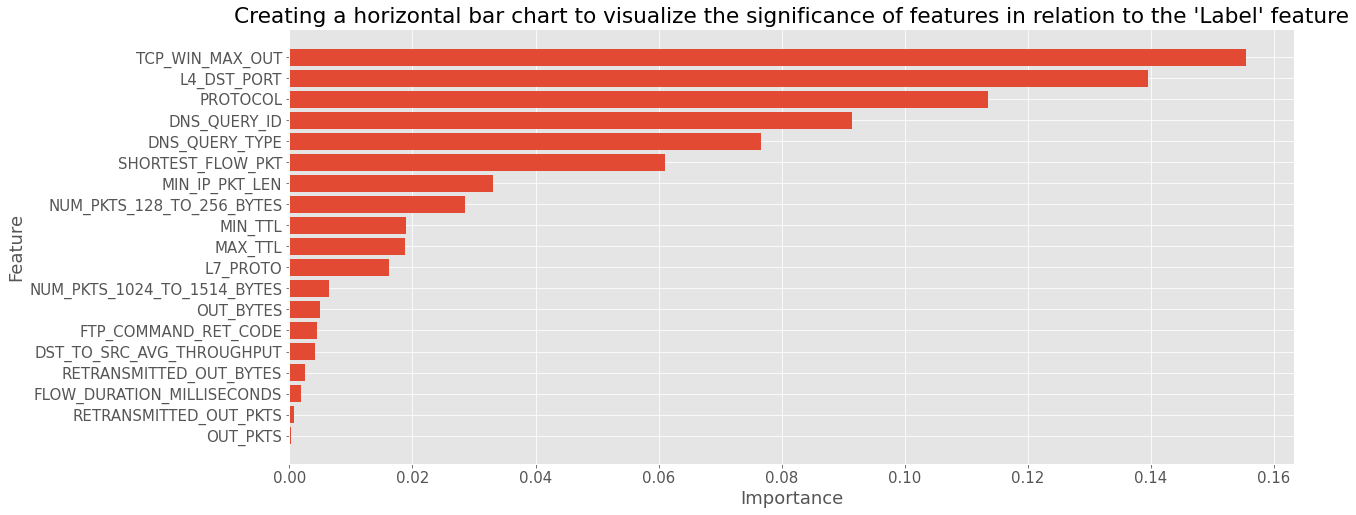

In [28]:
chart_corr_df = corr_df.sort_values(by='Importance').reset_index(drop=True)
chart_labels = chart_corr_df['Features'].values
chart_data = chart_corr_df['Importance'].values

with plt.style.context(style="ggplot"):
    plt.figure(figsize=(18,8))
    plt.rcParams['font.size'] = 15
    plt.barh(
        width=chart_data,
        y=chart_labels
    )
    plt.title(label="Creating a horizontal bar chart to visualize the significance of features in relation to the 'Label' feature")
    plt.xlabel(xlabel='Importance')
    plt.ylabel(ylabel='Feature')
    plt.show()

In [29]:
with open(file="trained_models/selected_features.pkl", mode="wb") as file:
    pickle.dump(obj=corr_df['Features'].values.tolist(), file=file)

In [30]:
df.head()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,DURATION_IN,DURATION_OUT,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,SHORTEST_FLOW_PKT,MIN_IP_PKT_LEN,MAX_IP_PKT_LEN,SRC_TO_DST_SECOND_BYTES,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_IN_BYTES,RETRANSMITTED_IN_PKTS,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_UP_TO_128_BYTES,NUM_PKTS_128_TO_256_BYTES,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Attack
0,46716,53,17,0.0,54,1,54,1,0,0,0,0,0,0,0,0,54,54,54,54,54.0,54.0,0,0,0,0,432000,432000,2,0,0,0,0,0,0,0,0,46447,1,0,0,6
1,55732,80,6,7.0,520,4,1236,2,30,30,26,0,0,0,64,64,1176,52,52,1176,520.0,1236.0,0,0,0,0,4160000,9888000,4,0,1,0,1,29200,5792,0,0,0,0,0,0,1
2,41882,28129,6,0.0,48,1,0,0,2,2,0,0,0,0,0,0,48,48,0,48,48.0,0.0,0,0,0,0,384000,0,1,0,0,0,0,4096,0,0,0,0,0,0,0,5
3,40890,53,17,0.0,72,1,0,0,0,0,0,0,0,0,0,0,72,72,0,72,72.0,0.0,0,0,0,0,576000,0,1,0,0,0,0,0,0,0,0,64846,12,0,0,2
4,6482,22666,6,0.0,48,1,0,0,2,2,0,0,0,0,0,0,48,48,0,48,48.0,0.0,0,0,0,0,384000,0,1,0,0,0,0,4096,0,0,0,0,0,0,0,5


In [31]:
df.shape

(35000, 42)

In [32]:
df = df[corr_df['Features'].values.tolist() + ['Attack']]
df.head()

,TCP_WIN_MAX_OUT,L4_DST_PORT,PROTOCOL,DNS_QUERY_ID,DNS_QUERY_TYPE,SHORTEST_FLOW_PKT,MIN_IP_PKT_LEN,NUM_PKTS_128_TO_256_BYTES,MIN_TTL,MAX_TTL,L7_PROTO,NUM_PKTS_1024_TO_1514_BYTES,OUT_BYTES,FTP_COMMAND_RET_CODE,DST_TO_SRC_AVG_THROUGHPUT,RETRANSMITTED_OUT_BYTES,FLOW_DURATION_MILLISECONDS,RETRANSMITTED_OUT_PKTS,OUT_PKTS,Attack
0,0,53,17,46447,1,54,54,0,0,0,0.0,0,54,0,432000,0,0,0,1,6
1,5792,80,6,0,0,52,52,0,64,64,7.0,1,1236,0,9888000,0,0,0,2,1
2,0,28129,6,0,0,48,0,0,0,0,0.0,0,0,0,0,0,0,0,0,5
3,0,53,17,64846,12,72,0,0,0,0,0.0,0,0,0,0,0,0,0,0,2
4,0,22666,6,0,0,48,0,0,0,0,0.0,0,0,0,0,0,0,0,0,5


In [33]:
df.shape

(35000, 20)

In [34]:
X=df.drop(labels='Attack',axis=1)
X.head()

,TCP_WIN_MAX_OUT,L4_DST_PORT,PROTOCOL,DNS_QUERY_ID,DNS_QUERY_TYPE,SHORTEST_FLOW_PKT,MIN_IP_PKT_LEN,NUM_PKTS_128_TO_256_BYTES,MIN_TTL,MAX_TTL,L7_PROTO,NUM_PKTS_1024_TO_1514_BYTES,OUT_BYTES,FTP_COMMAND_RET_CODE,DST_TO_SRC_AVG_THROUGHPUT,RETRANSMITTED_OUT_BYTES,FLOW_DURATION_MILLISECONDS,RETRANSMITTED_OUT_PKTS,OUT_PKTS
0,0,53,17,46447,1,54,54,0,0,0,0.0,0,54,0,432000,0,0,0,1
1,5792,80,6,0,0,52,52,0,64,64,7.0,1,1236,0,9888000,0,0,0,2
2,0,28129,6,0,0,48,0,0,0,0,0.0,0,0,0,0,0,0,0,0
3,0,53,17,64846,12,72,0,0,0,0,0.0,0,0,0,0,0,0,0,0
4,0,22666,6,0,0,48,0,0,0,0,0.0,0,0,0,0,0,0,0,0


In [35]:
y=df[['Attack']]
y.head()

,Attack
0,6
1,1
2,5
3,2
4,5


# Data Normalization

In [36]:
scaler = MinMaxScaler()
scaler = scaler.fit(X.values)
scaled_X = scaler.transform(X.values)

df = pd.DataFrame(data=scaled_X,columns=X.columns)
df['Attack'] = y.values.ravel()
df.head()

,TCP_WIN_MAX_OUT,L4_DST_PORT,PROTOCOL,DNS_QUERY_ID,DNS_QUERY_TYPE,SHORTEST_FLOW_PKT,MIN_IP_PKT_LEN,NUM_PKTS_128_TO_256_BYTES,MIN_TTL,MAX_TTL,L7_PROTO,NUM_PKTS_1024_TO_1514_BYTES,OUT_BYTES,FTP_COMMAND_RET_CODE,DST_TO_SRC_AVG_THROUGHPUT,RETRANSMITTED_OUT_BYTES,FLOW_DURATION_MILLISECONDS,RETRANSMITTED_OUT_PKTS,OUT_PKTS,Attack
0,0.00000,0.000809,1.0000,0.709234,0.003922,0.056399,0.138107,0.0,0.00000,0.00000,0.000000,0.000000,0.002184,0.0,0.002200,0.0,0.0,0.0,0.021277,6
1,0.08838,0.001221,0.3125,0.000000,0.000000,0.052061,0.132992,0.0,0.25498,0.25498,0.028689,0.058824,0.050000,0.0,0.050354,0.0,0.0,0.0,0.042553,1
2,0.00000,0.429260,0.3125,0.000000,0.000000,0.043384,0.000000,0.0,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,5
3,0.00000,0.000809,1.0000,0.990182,0.047059,0.095445,0.000000,0.0,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,2
4,0.00000,0.345893,0.3125,0.000000,0.000000,0.043384,0.000000,0.0,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,5


In [37]:
with open(file='trained_models/scaler.pkl',mode='wb') as file:
    pickle.dump(obj=scaler,file=file)

# Data Splitting

In [38]:
X = df.drop(labels='Attack', axis=1)
y = df[['Attack']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(28000, 19) (7000, 19) (28000, 1) (7000, 1)


# Saving the splitted data

In [39]:
X_train.to_csv('train_test_data/X_train.csv',index=False)
X_test.to_csv('train_test_data/X_test.csv',index=False)
y_train.to_csv('train_test_data/y_train.csv',index=False)
y_test.to_csv('train_test_data/y_test.csv',index=False)

---